Enter the position you want to compare: LW


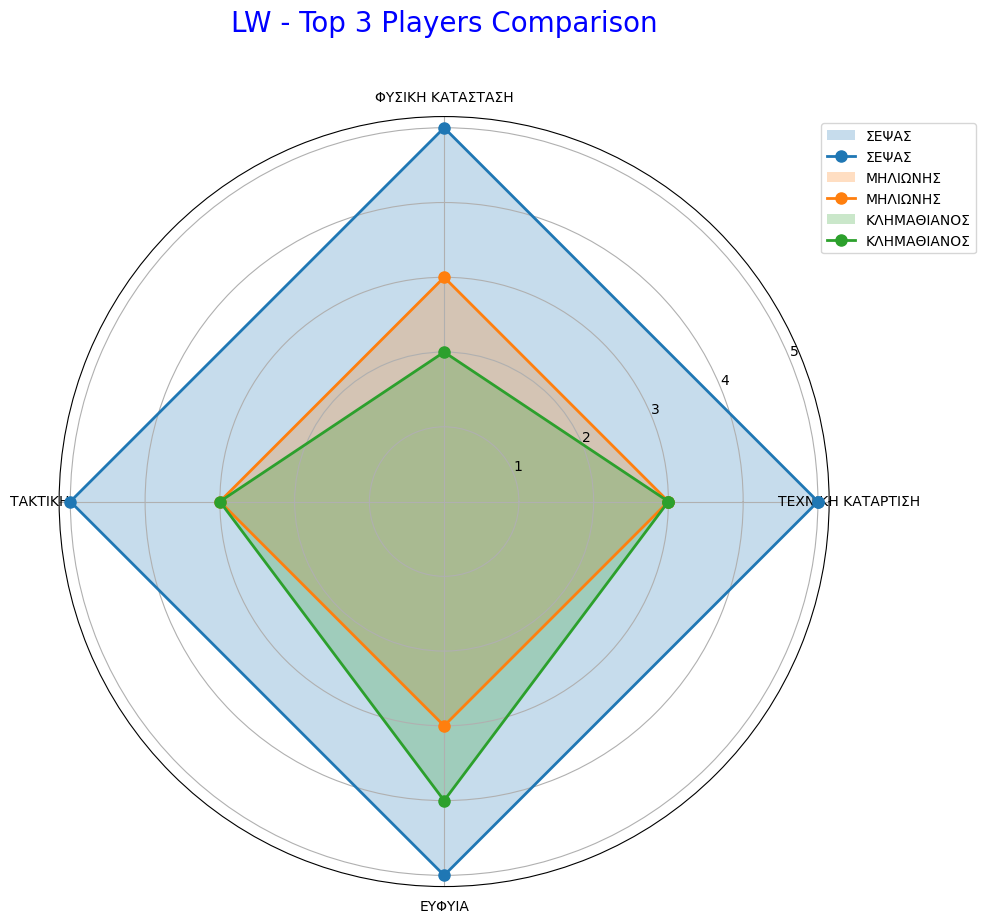

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_combined_radar_chart(position, players_data, player_names, save_path):
    # Number of attributes
    num_attributes = len(players_data[0])

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()

    # The plot is circular, so we need to "close the loop" by adding the starting data point at the end
    angles += angles[:1]

    # Ensure the directory in the file path exists
    directory = os.path.dirname(save_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Calculate average scores for each player
    average_scores = np.mean(players_data, axis=1)

    # Sort players based on average scores (descending order)
    sorted_indices = np.argsort(average_scores)[::-1]
    sorted_player_names = [player_names[i] for i in sorted_indices]
    sorted_players_data = [players_data[i] for i in sorted_indices]

    # Select the top three players
    top_players_names = sorted_player_names[:3]
    top_players_data = sorted_players_data[:3]

    # Create the radar chart with values for the top three players
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for player_data, player_name in zip(top_players_data, top_players_names):
        values = np.append(player_data, player_data[0])
        ax.fill(angles, values, label=player_name, alpha=0.25)
        ax.plot(angles, values, marker='o', linestyle='-', linewidth=2, markersize=8, label=player_name)

    # Set the labels for each attribute
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['ΤΕΧΝΙΚΗ ΚΑΤΑΡΤΙΣΗ', 'ΦΥΣΙΚΗ ΚΑΤΑΣΤΑΣΗ', 'ΤΑΚΤΙΚΗ', 'ΕΥΦΥΙΑ'])

    # Set the radial axis ticks
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels([1, 2, 3, 4, 5])

    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

    # Add a title with the position
    plt.title(f"{position} - Top 3 Players Comparison", size=20, color='blue', y=1.1)

    # Save the radar chart as JPEG without cropping any letters
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    # Show the radar chart
    plt.show()

# Load the Excel file
file_path = "C:\\Users\\anton\\Desktop\\scouting National team\\K-16\\RADAR MAP DATA.xlsx"
df = pd.read_excel(file_path)

# Extract the common attributes for all players
common_attributes = ['ΤΕΧΝΙΚΗ ΚΑΤΑΡΤΙΣΗ', 'ΦΥΣΙΚΗ ΚΑΤΑΣΤΑΣΗ', 'ΤΑΚΤΙΚΗ', 'ΕΥΦΥΙΑ']

# Display available columns and check for correct column names
for attribute in common_attributes:
    if attribute not in df.columns:
        print(f"Warning: Column '{attribute}' not found in DataFrame.")

# Input the position you want to compare
selected_position = input("Enter the position you want to compare: ")

# Filter DataFrame for the selected position
position_attributes = df.loc[df['ΘΕΣΗ'] == selected_position]

# Check if there are players in the selected position
if not position_attributes.empty:
    player_names = position_attributes['ΕΠΩΝΥΜΟ'].tolist()
    players_data = position_attributes[common_attributes].values

    # Create combined radar chart for the top three players in the selected position
    position_save_path = f"C:\\Users\\anton\\Desktop\\scouting National team\\K-16\\RadarCharts\\{selected_position}_top3_combined_radar_chart.jpg"
    create_combined_radar_chart(selected_position, players_data, player_names, position_save_path)
else:
    print(f"No players found in position '{selected_position}'.")
